In [1]:
import csv
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
def azimuthandaltitud (hor_coord,ant_coord):
    Ax = ant_coord['AX'][:1]
    Ay = ant_coord['AY'][:1]

    Hx = hor_coord[['X']]
    Hy = hor_coord[['Y']]
    
    Az = ant_coord['AZ'][:1]
    Hz = hor_coord[['Z1']]
    valAz = Az.values
    
    valHx = Hx.values
    valHy = Hy.values
    
    incX = int(Ax) - valHx
    incY = int(Ay) - valHy
    
    #calculate distance between antenna and horizont
    distace = Hx.apply(lambda x: np.sqrt((x+Ax[0])**2+(Hy['Y']+Ay[0])**2))
    distrn = distace.rename(columns={'X':'distance'})
    
    #calculate latitud in degreen of the horizont
    altitud = Hz.apply(lambda x: (np.degrees(np.arctan2(distrn['distance'],valAz[0]))))
    alta0 = altitud.fillna(0)
    
    #calculate the azimuth in degrees of the point of the horizont vs the antenna pint of view
    az = np.degrees(np.arctan2(incY,incX))
    azpd = pd.DataFrame(az)
    azpdrn = azpd.rename(columns={0:'az'})  
    pd360 = azpdrn['az'].apply(lambda x: x+360 if x<0 else x)
    
    
    
     
    
    #merge all thew values in one dataframe 
    
    azalt = pd.concat([pd360,alta0,distrn],axis=1)
    

    return(azalt)


In [3]:
horizontpt = pd.read_csv(r'/media/pablo/LocalData/visibilityAnalysis/horizon_points.csv')
hor_coord = horizontpt[['X','Y','Z1']]
horcoord_0 = horizontpt.fillna(0)


In [4]:
antpt = pd.read_csv(r'/media/pablo/LocalData/visibilityAnalysis/horizon_antena.csv')
ant_coord = antpt[['AX','AY','AZ']]

In [5]:
az1 = azimuthandaltitud(hor_coord,ant_coord)

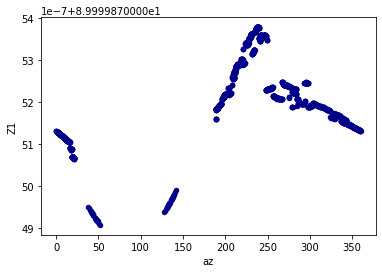

In [6]:
ax1 = az1.plot.scatter(x='az',
...                    y='Z1',
...                    c='DarkBlue')

In [69]:
npaz = az1['az'].to_numpy()
npaz

array([239.405895  , 239.32587176, 239.22444243, ..., 129.01867127,
        52.1280312 , 127.85488251])

In [74]:
npdist = az1['distance'].to_numpy()
test = npdist/1000000
test

array([9.19511966, 9.19512467, 9.19512941, ..., 9.16309541, 9.16058954,
       9.16281332])

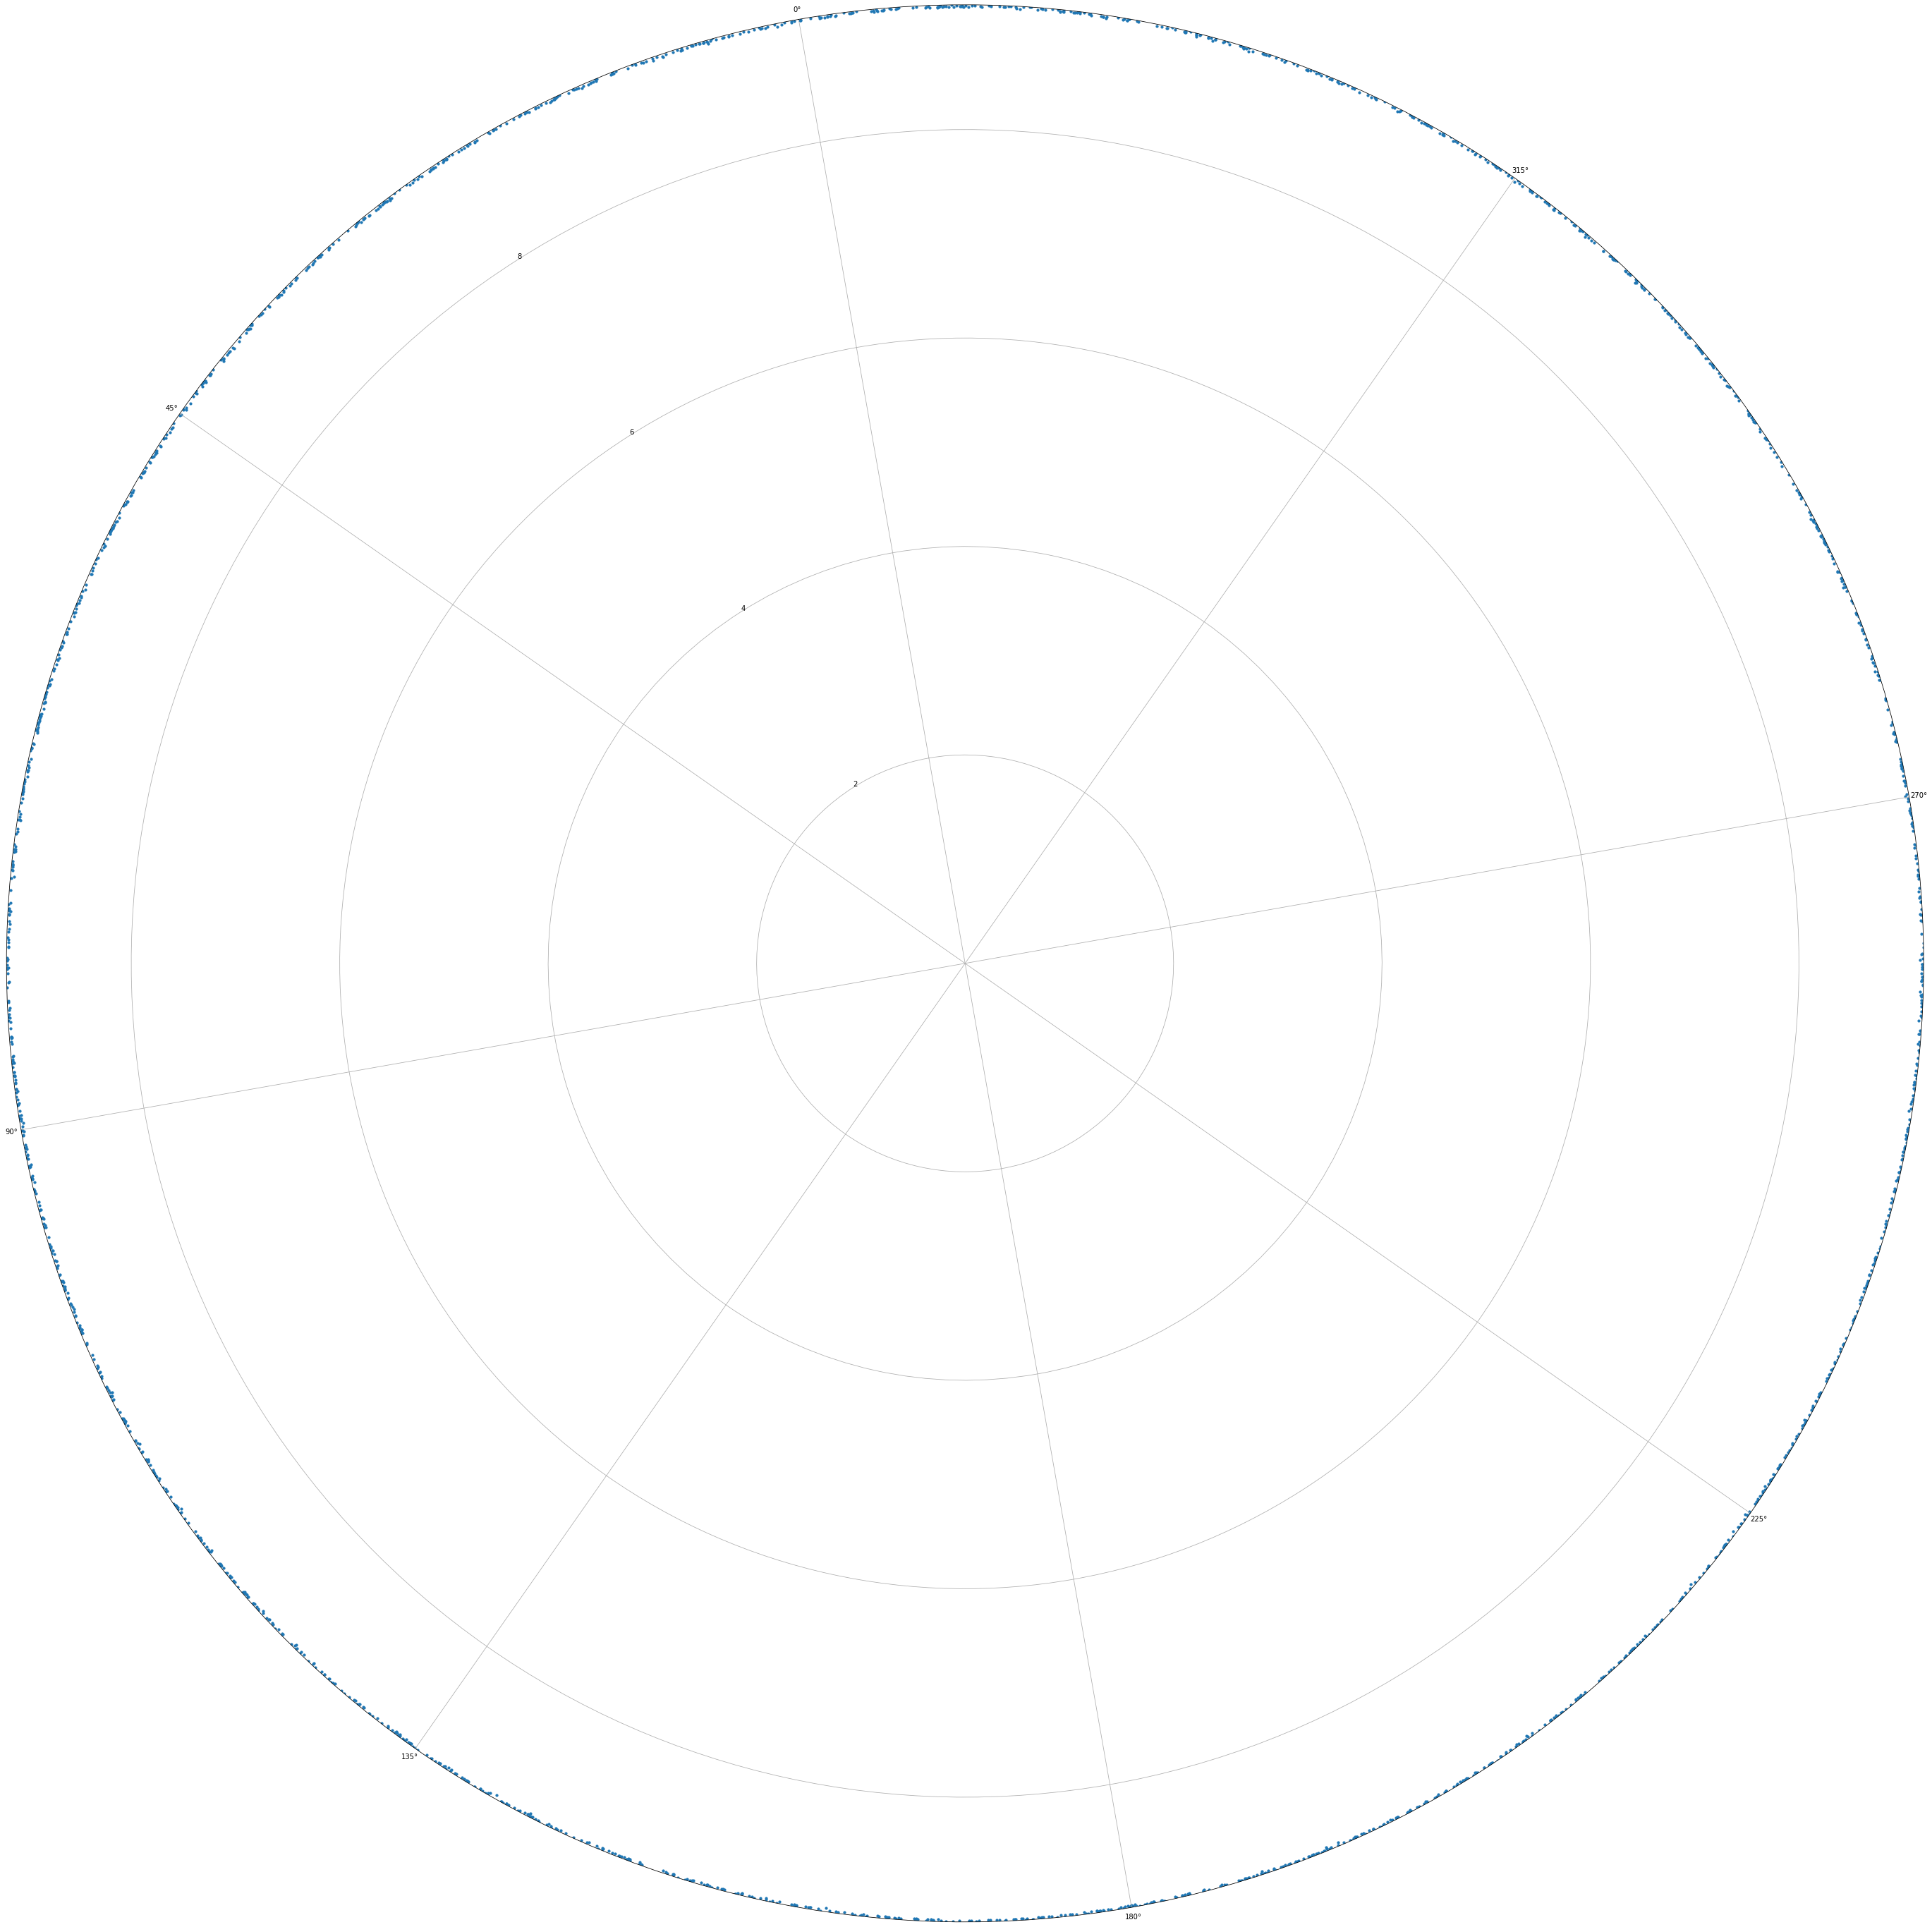

In [73]:
fig = plt.figure(figsize = (50, 50))
ax = fig.add_subplot(projection='polar')

ax.set_rmax(10000)
c = ax.scatter(npaz ,test, s= 10,cmap='hsv')

ax.set_theta_zero_location('W', offset=10000000)
ax.grid(True)



plt.show()